#                        &&& Project : DDOS ATTACK DETECTION &&&

In [1]:
# Importation des bibliothéques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# VISUALIZATION DATASET

In [2]:
dataset = pd.read_csv('dataset_sdn.csv')
dataset.head(10) # pour afficher les 10 premiers lignes

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


# DATA PREPROCESSING

In [3]:
# afficher les Dimensions du dataset
print("This Dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))

This Dataset has 104345 rows and 23 columns


In [4]:
#Descriptive statistics of dataset
display(dataset)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


<AxesSubplot:>

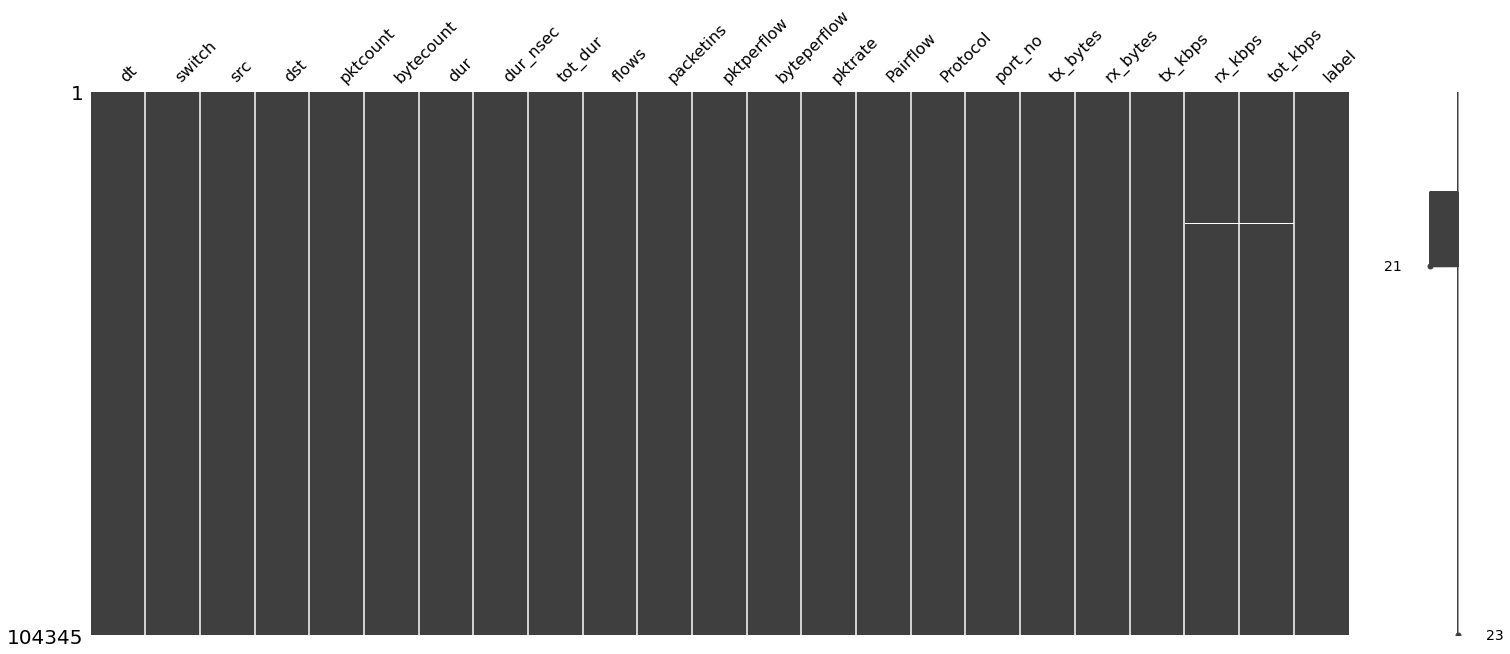

In [6]:
#heatmap of missing values
import missingno as msno
msno.matrix(dataset)

In [7]:
# Count of null values in each feature
dataset.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [8]:
# pourcentage
(dataset.isnull().sum()/dataset.isnull().count())*100

dt             0.00000
switch         0.00000
src            0.00000
dst            0.00000
pktcount       0.00000
bytecount      0.00000
dur            0.00000
dur_nsec       0.00000
tot_dur        0.00000
flows          0.00000
packetins      0.00000
pktperflow     0.00000
byteperflow    0.00000
pktrate        0.00000
Pairflow       0.00000
Protocol       0.00000
port_no        0.00000
tx_bytes       0.00000
rx_bytes       0.00000
tx_kbps        0.00000
rx_kbps        0.48493
tot_kbps       0.48493
label          0.00000
dtype: float64

In [9]:
# Drop rows with null values
dataset.dropna(inplace=True)

In [10]:
# collect of information after handling Null Values
print(dataset.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(dataset.shape[0], dataset.shape[1]))
# dataset passed of 104345 rows  to 103839 rows

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


In [11]:
# Distribution of Target Class ( malign: attack occured and benign : attack not occured)
malign = dataset[dataset['label'] == 1]
benign = dataset[dataset['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/dataset.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/dataset.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


Text(0, 0.5, 'Frequency %')

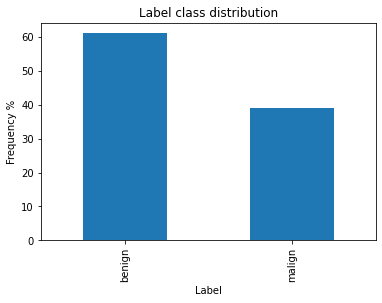

In [12]:
# visualization of targer class using plot
labels = ['benign','malign']
classes = pd.value_counts(dataset['label'], sort = True) / dataset['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

In [13]:
# Columns in the dataset
dataset.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [14]:
#  print Unique values in each column
print(dataset.apply(lambda col: col.unique()))

dt             [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount      [48294064, 134737070, 96294978, 110721156, 913...
dur            [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec       [716000000, 734000000, 744000000, 747000000, 7...
tot_dur        [101000000000.0, 281000000000.0, 201000000000....
flows          [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow     [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow    [14428310, 14424046, 14427244, 14426178, 14184...
pktrate        [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

In [16]:
# print Numerical Features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


In [17]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if dataset[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [24]:

categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


In [18]:
dataset[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


In [19]:
#Continuous features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


# Exploratory Data Analysis

In [26]:
# plot function definition
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=dataset).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=dataset,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

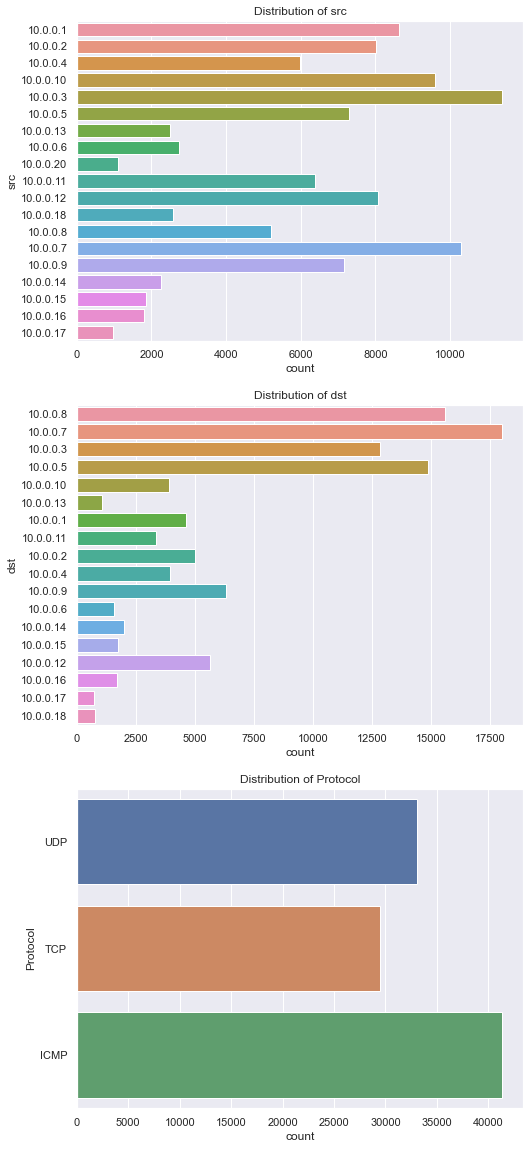

In [27]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

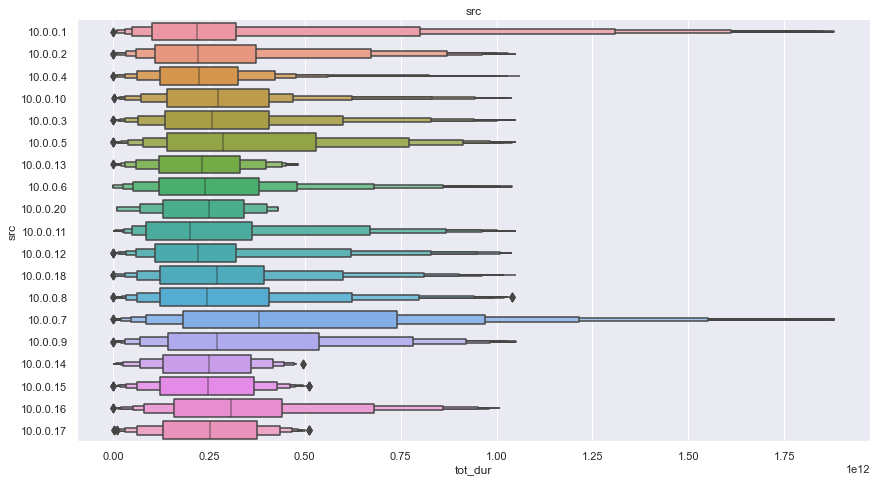

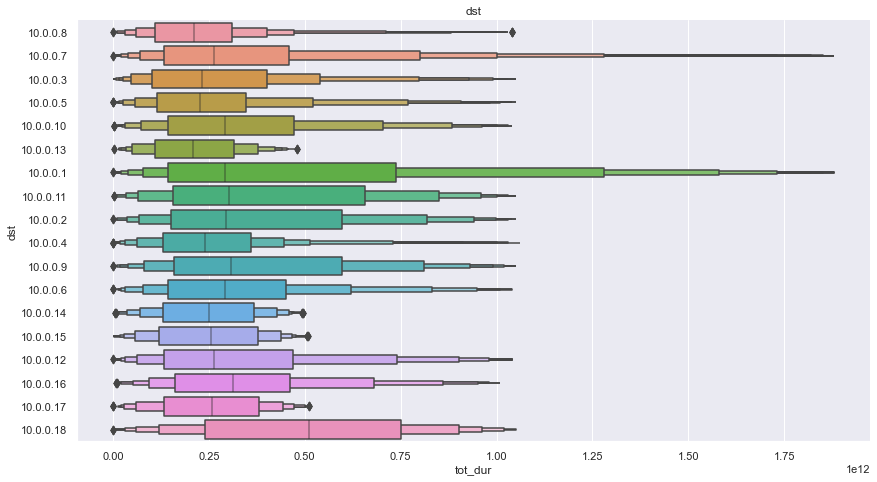

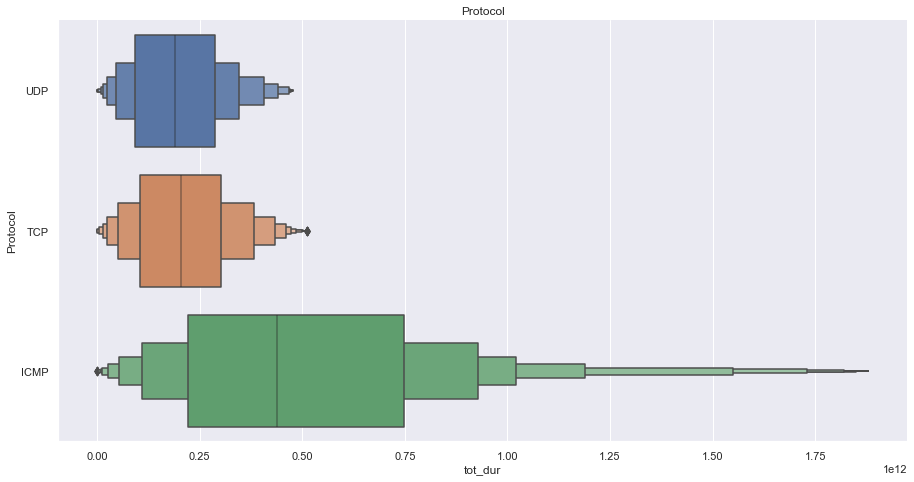

In [28]:
# Visualize the quartiles of categorical features wrt total duration
for i in range(len(categorical_features)):
    g = sns.catplot(data=dataset,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

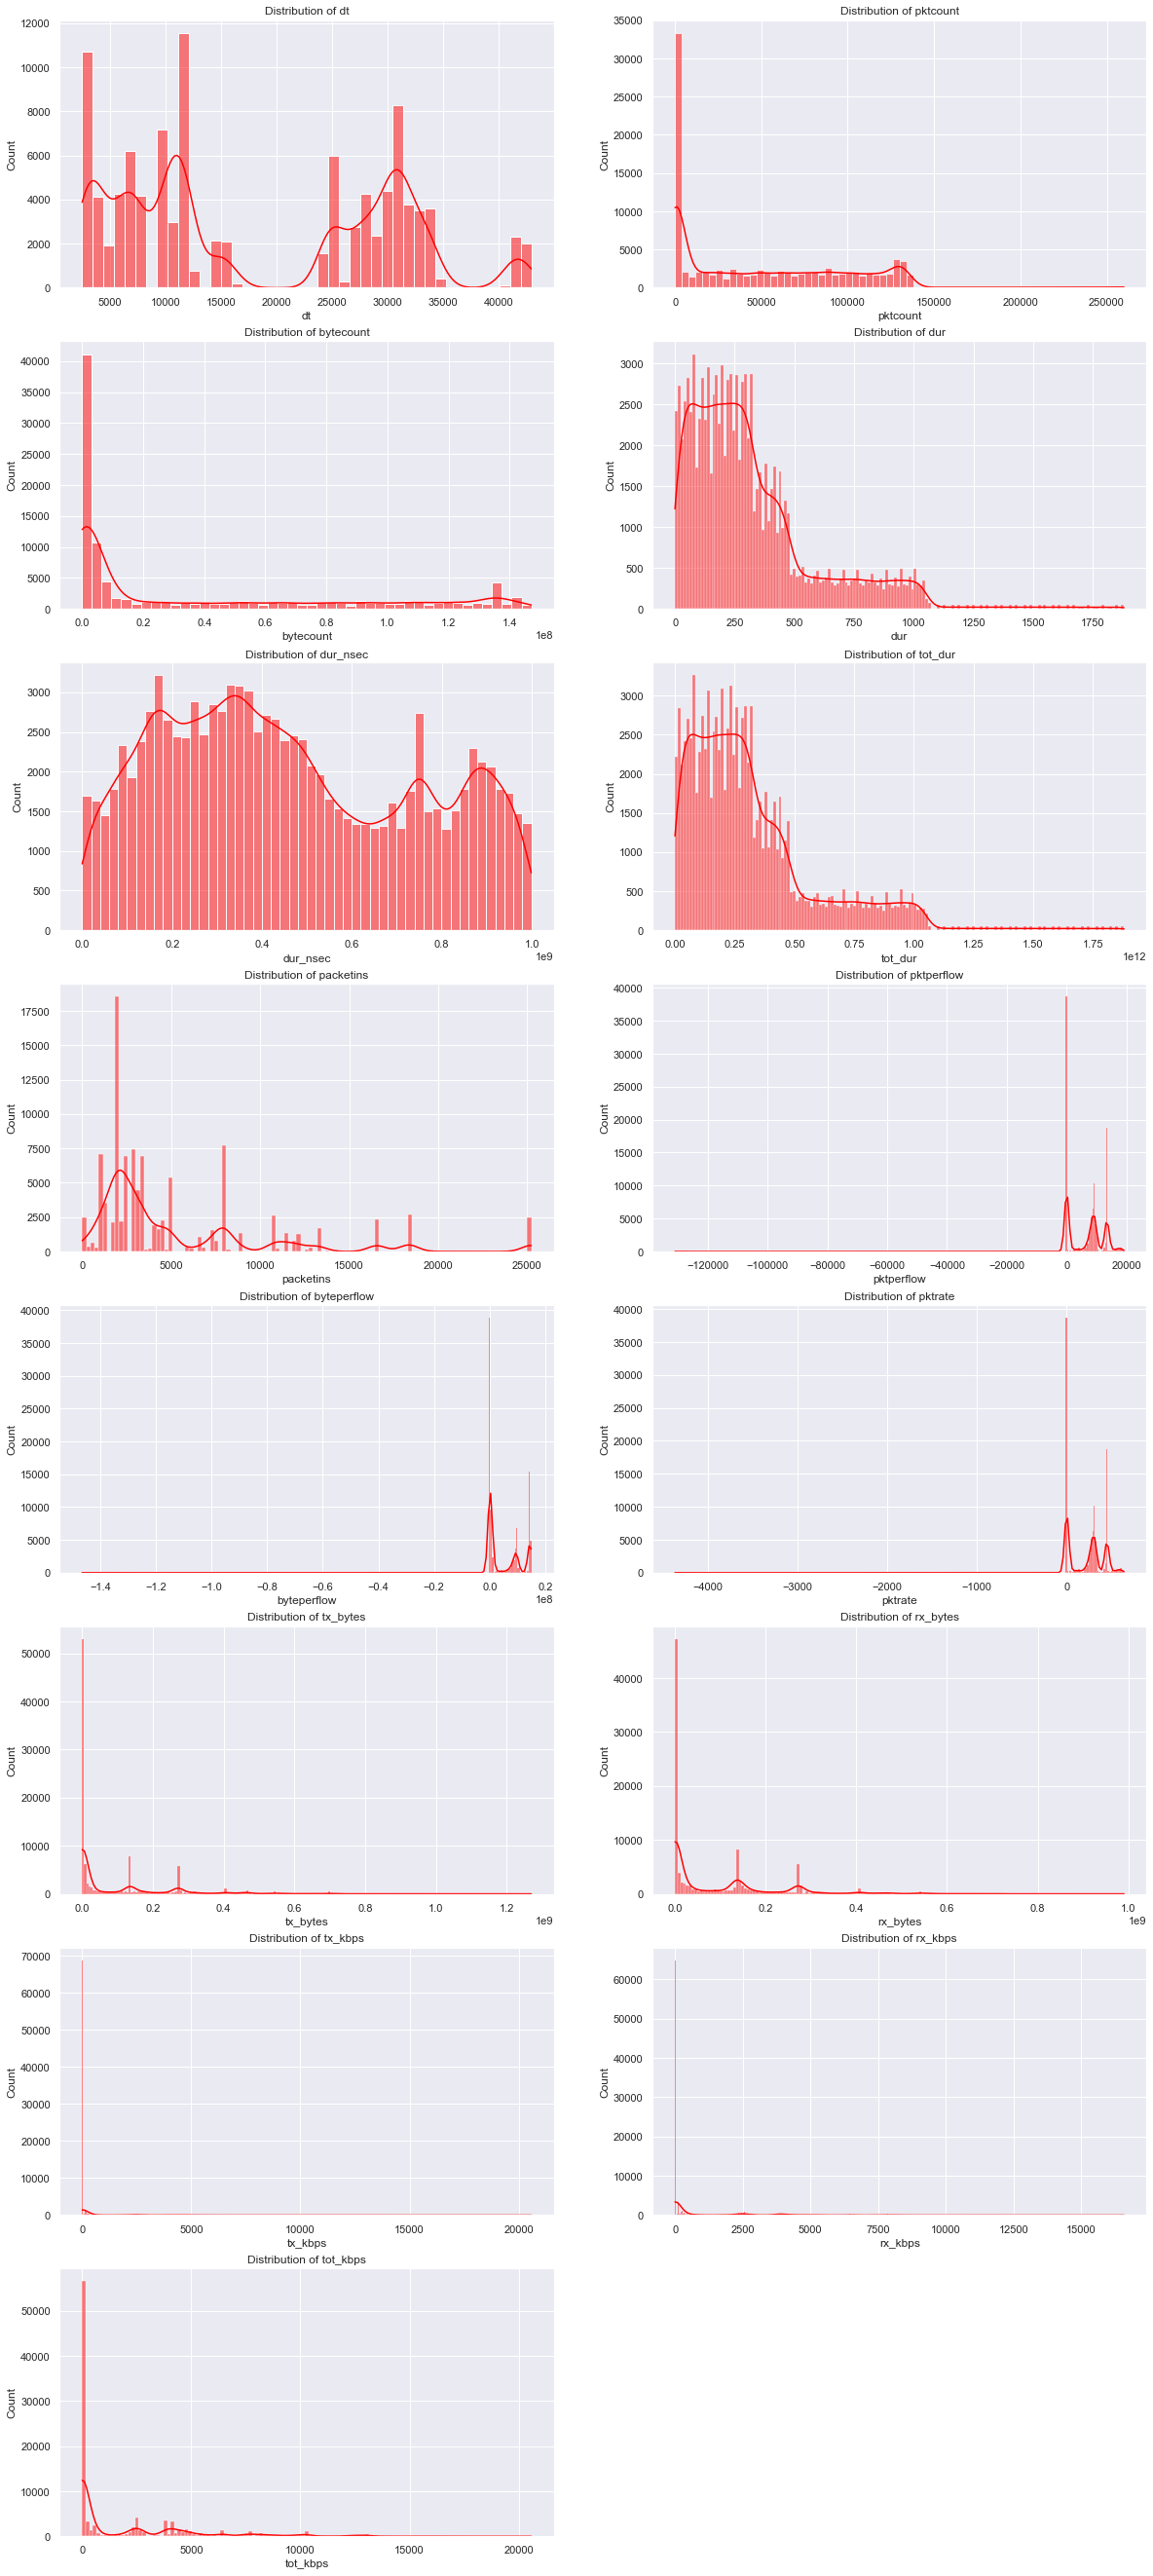

In [29]:
# Visualize the distribution of continuous features
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

<Figure size 1440x1440 with 0 Axes>

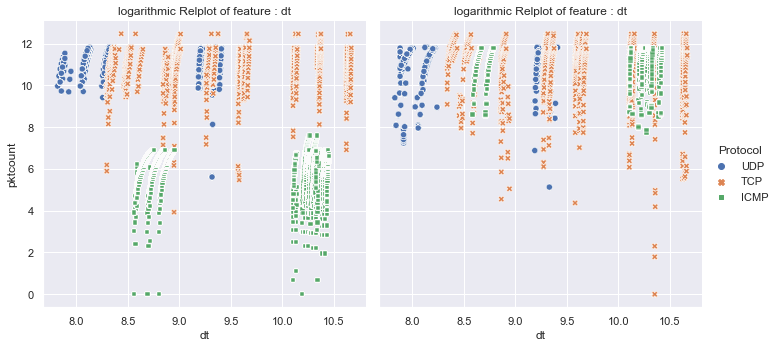

<Figure size 1440x1440 with 0 Axes>

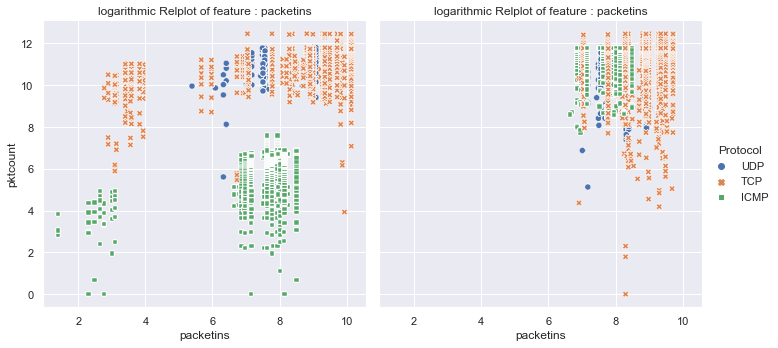

<Figure size 1440x1440 with 0 Axes>

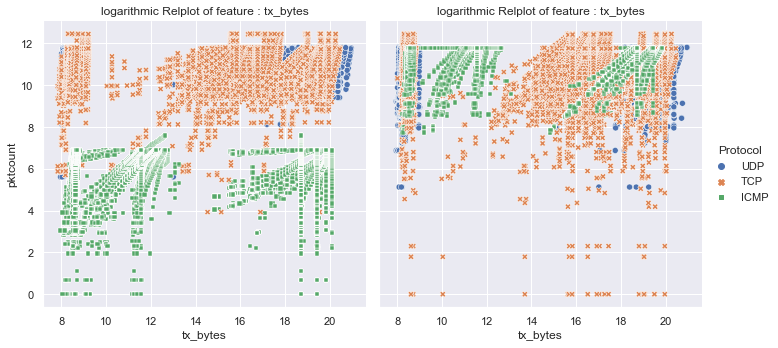

<Figure size 1440x1440 with 0 Axes>

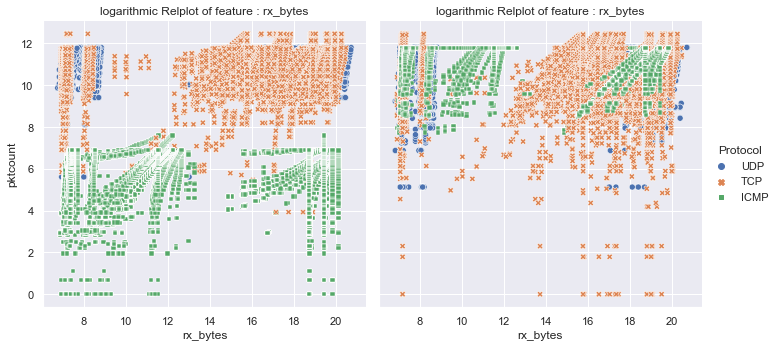

In [31]:
# Visualize the distribution of continuous features wrt packet count, protocol and type of attack
# Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

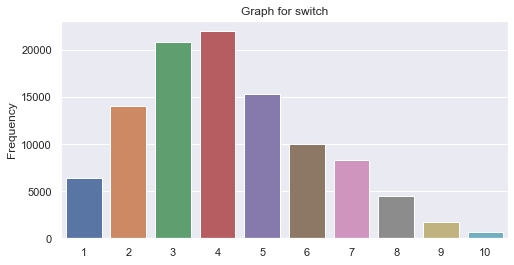

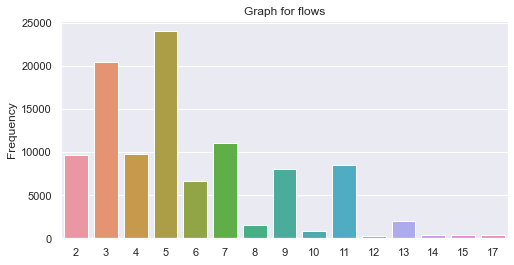

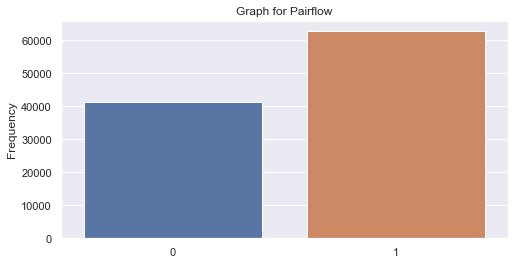

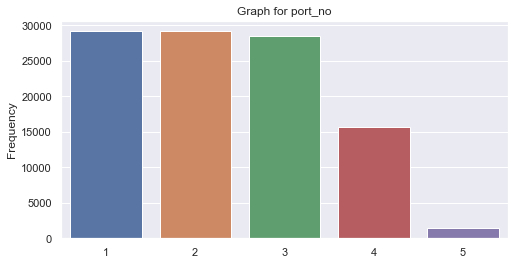

In [33]:
# Visualize the distribution of numerical discrete features
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = dataset[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [34]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(dataset['Protocol'], dataset['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

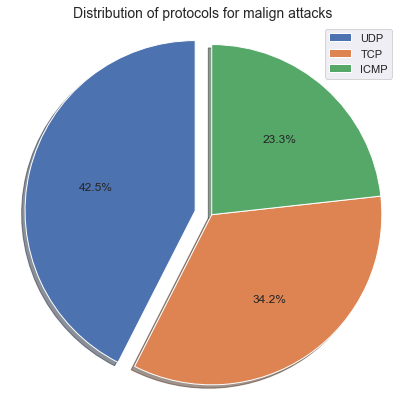

In [35]:
# Distribution of protocols for malign attacks
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

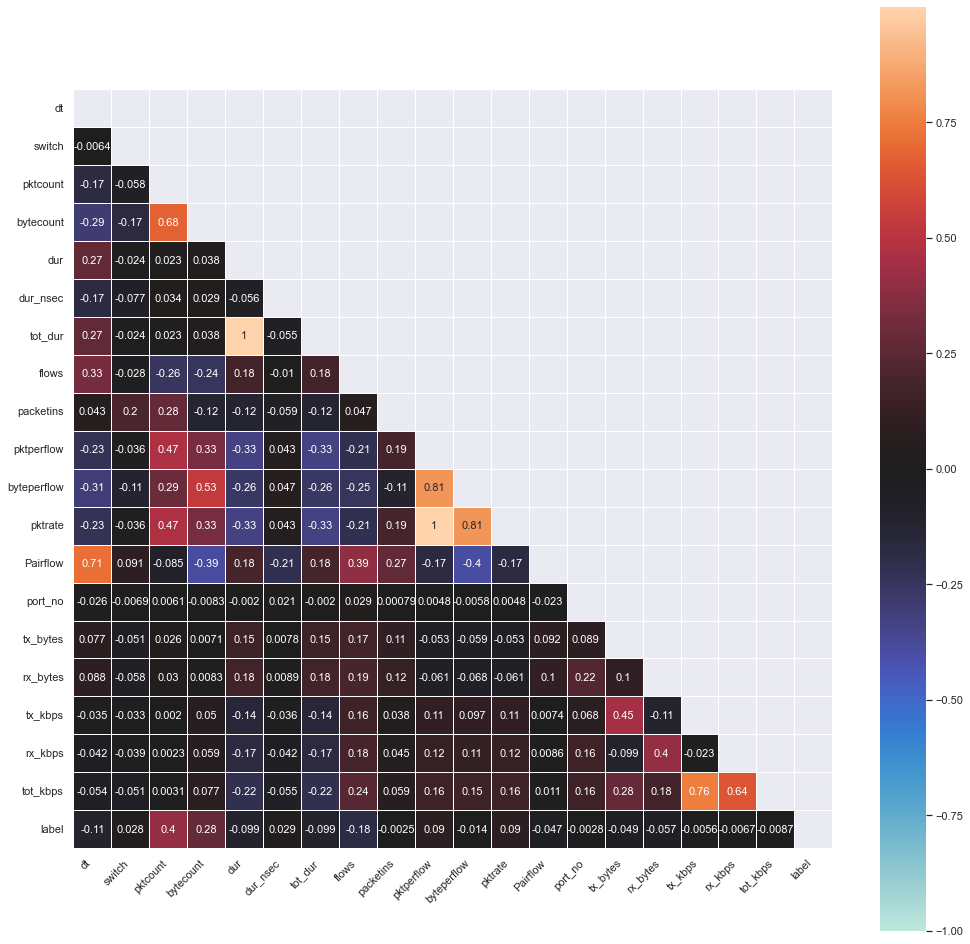

In [37]:
# Heat map of correlation of features¶
correlation_matrix = dataset.corr()
fig = plt.figure(figsize=(17,17))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

In [38]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


In [39]:
# Encoding categorical features
dataset = pd.get_dummies(dataset, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(dataset.shape[0], dataset.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [41]:
#dataframe after encoding
dataset.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1


In [42]:
dataset.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10      uint8
src_10.0.0.11      uint8
src_10.0.0.12      uint8
src_10.0.0.13      uint8
src_10.0.0.14      uint8
src_10.0.0.15      uint8
src_10.0.0.16      uint8
src_10.0.0.17      uint8
src_10.0.0.18      uint8
src_10.0.0.2       uint8
src_10.0.0.20      uint8
src_10.0.0.3       uint8
src_10.0.0.4       uint8
src_10.0.0.5       uint8
src_10.0.0.6       uint8
src_10.0.0.7       uint8
src_10.0.0.8       uint8
src_10.0.0.9       uint8
dst_10.0.0.10      uint8
dst_10.0.0.11      uint8


In [43]:
# Split into Independent and dependent variables¶
x = dataset.drop(['label'], axis=1)
y = dataset['label']

In [45]:
# Normalizing features
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)

# Train-Test-Split 
# 75 % TRAIN , 25% TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

# Implementation of model using KNN

In [57]:
Classifier_accuracy = []

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)


In [58]:
# calcul accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 96.59


# Implementation of model using SVM

In [59]:
from sklearn.svm import SVC
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)


In [60]:
# calcul accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

Accuracy of SVM Classifier : 97.36


# Implementation of model using NAIVE  BAYES

In [61]:
from sklearn.naive_bayes import CategoricalNB
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)


In [62]:
# calcul accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

Accuracy of Naive Bayes Classifier : 71.31


# Implementation of model using DNN

In [1]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

NameError: name 'keras' is not defined